In [5]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [42]:
def backtest(ticker, start_date, stop_loss_percent, exit_price_percent, plot:bool):
    # fetch data with yfinance, clean
    data = yf.download(ticker, start=start_date)
    data = data[['Close']].copy()
    data.dropna(inplace=True)

    # handle empty data
    if data.empty:
        return [0, 0, 0]
    
    # initialize experiment
    entry_price = data.iloc[0]['Close'].item()
    stop_loss = entry_price - entry_price * (stop_loss_percent / 100)
    exit_price = entry_price + entry_price * (exit_price_percent / 100)
    #data['Daily Return'] = data['Close'].pct_change()
    #data['Cumulative Return'] = (1 + data['Daily Return']).cumprod()

    # run trade exit simulation
    exit_index = None
    for idx, price in enumerate(data['Close'].iloc[:,0]):
        if price <= stop_loss:
            exit_index = idx
            break
        if price >= exit_price:
            exit_index = idx
            break

    # trim data to exit index (price behavior after this is unecessary)
    if exit_index is not None:
        data = data.iloc[:exit_index + 1]

    # download historical data for the S&P 500 index for comparison
    start_date = data.index[0]
    end_date = data.index[-1] + pd.Timedelta(days=1)

    sp500_data = yf.download("^GSPC", start=start_date, end=end_date)
    sp500_start = sp500_data[sp500_data.index >= start_date]['Close'].iloc[0].item()
    sp500_end = sp500_data[sp500_data.index <= data.index[-1]]['Close'].iloc[-1].item()

    # calculate total performance of strategy and simultanious performance of the smp500
    final_price = data.iloc[-1]['Close'].item()
    total_return = (final_price - entry_price) / entry_price
    sp500_return = (sp500_end - sp500_start) / sp500_start

    if (plot):
        # generate plot
        plt.figure(figsize=(10, 5))
        plt.plot(data.index, data['Close'].iloc[:,0].values, label='Daily Price')
        plt.margins(x=0.05, y=0.1)
        plt.axhline(y=exit_price, color='green', linestyle='--', label='Exit Price')
        plt.axhline(y=stop_loss, color='red', linestyle='--', label='Stop Loss')
        plt.title(f"{ticker} Trade Simulation beginning {start_date}")
        plt.xlabel("Date")
        plt.ylabel("Valuation (USD)")
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # print report
        print(f"Entry Price: ${entry_price:.2f}")
        print(f"Final Price:  ${final_price:.2f}")
        print(f"Holding Period: {len(data)} days")
        print(f"Total Return: {total_return:.2%}")
        print(f"Equivalent SMP 500: {sp500_return:.2%}")
    else:
       return [total_return, sp500_return, len(data)]

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


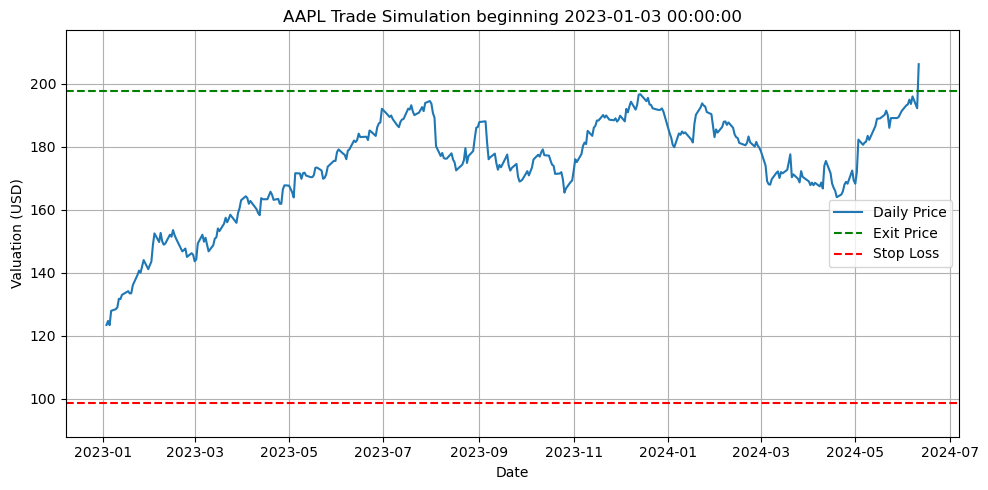

Entry Price: $123.47
Final Price:  $206.19
Holding Period: 362 days
Total Return: 66.99%
Equivalent SMP 500: 40.56%


In [43]:
# visualize a ticker using a given stop loss and exit price strategy
backtest(ticker="AAPL", start_date="2023-01-01", stop_loss_percent=20, exit_price_percent=60, plot=True)

In [44]:
# return a list containing a single ticker vs SMP500 performance using a given stop loss and exit price strategy (and how long the hold would have been)
backtest(ticker="AAPL", start_date="2023-01-01", stop_loss_percent=10, exit_price_percent=30, plot=False)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


[0.3001351990973545, 0.05927873768081403, 61]

In [45]:
# compare a series of tickers using a given stop loss and exit price strategy
with open('tickers.txt', 'r') as f:
    tickers = f.readlines()

tickers = [line.strip() for line in tickers]

df = pd.DataFrame({'Ticker':[],
                  'SMP500':[],
                  'Days Held':[]})

for ticker in tickers:
    result = backtest(ticker=ticker, start_date="2023-01-01", stop_loss_percent=10, exit_price_percent=30, plot=False)
    new_row = pd.DataFrame({'Ticker':[result[0]], 'SMP500':[result[1]], 'Days Held':[result[2]]})
    df = pd.concat([df, new_row], ignore_index=True)


[*********************100%***********************]  1 of 1 completed

1 Failed download:
['OEDV']: YFPricesMissingError('possibly delisted; no price data found  (1d 2023-01-01 -> 2025-07-09)')
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%**********************

KeyboardInterrupt: 

In [24]:
df

,Ticker,SMP500,Days Held
0,0.000000,0.000000,0.0
1,0.300135,0.059279,61.0
2,-0.143691,0.008269,48.0
3,0.315661,0.092993,22.0
4,-0.104580,0.096189,96.0
5,0.303233,0.080144,90.0
6,0.313263,0.473432,413.0
7,0.314934,0.157343,114.0
8,-0.106286,0.017727,50.0
9,0.308293,0.228313,254.0


In [25]:
df.mean()

Ticker        0.082175
SMP500        0.096116
Days Held    91.966667
dtype: float64

In [138]:
sp500_data['Close']

Ticker,^GSPC
Date,
2022-01-03,4796.560059
2022-01-04,4793.540039
2022-01-05,4700.580078
2022-01-06,4696.049805
2022-01-07,4677.029785
...,...
2023-12-22,4754.629883
2023-12-26,4774.750000
2023-12-27,4781.580078
